# Homework 3

## Imports


In [364]:
# Sklearn Imports
import sklearn as sk
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# Other Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy.io.arff import loadarff
from scipy import stats
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [365]:
# Images
IMAGES_DIR = Path('images')
IMAGES_DIR.mkdir(parents=True, exist_ok=True)

# Data
DATA_DIR = Path('data')
DATA_DIR.mkdir(parents=True, exist_ok=True)
DATA_FILE = 'winequality-red.csv'
DATA_PATH = DATA_DIR / DATA_FILE

# Load the data
df = pd.read_csv(DATA_PATH, sep=';')

# Show the first 5 rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [366]:

# Define features and labels 
X = df.drop("quality", axis=1)
y = df["quality"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=0,
                                                    train_size=0.8)


# Question 1 

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MAE: 0.500751308203269
MAE: 0.5265620694987204
MAE: 0.4925455157263425


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MAE: 0.5066285079381487
MAE: 0.5240367281761309


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MAE: 0.5135388230466388
MAE: 0.5073710606044435
MAE: 0.5297962430623901
MAE: 0.5016764803028032


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MAE: 0.494265218450627


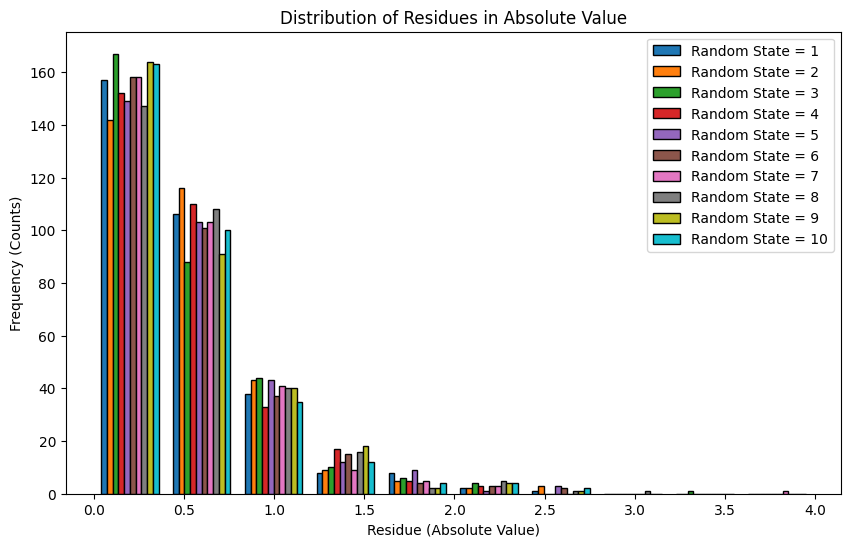

In [367]:
# List for Residues 
residues = []

# MAE list for question 2
mae_list = []
mae_rounded = []
mae_bounded = []
mae_bounded_rounded = []
rmse_early = []

# Loop through different values of random_state for MLPClassifier
for random_state in range(1, 11):
    # Create the classifier
    mlp = MLPRegressor(hidden_layer_sizes=(10, 10),
                       activation='relu',
                       early_stopping=True,
                       validation_fraction=0.2,
                       random_state=random_state)
    
    # Fit the classifier to the training data
    mlp.fit(X_train, y_train)

    # Predict the labels of the test set
    y_pred = mlp.predict(X_test)

    # Add the residues to the list
    residues.append(abs(y_test - y_pred))

    # Calculate the MAE
    mae = mean_absolute_error(y_test, y_pred)
    mae_list.append(mae)
    print(f"MAE: {mae}")

    # Round the predictions
    y_pred_rounded = np.round(y_pred)
    mae_rounded.append(mean_absolute_error(y_test, y_pred_rounded))

    # Bound the predictions
    y_pred_bounded = np.clip(y_pred, 1, 10)
    mae_bounded.append(mean_absolute_error(y_test, y_pred_bounded))

    # Bounded after Rounded
    y_pred_bounded_rounded = np.clip(y_pred_rounded, 1, 10)
    mae_bounded_rounded.append(mean_absolute_error(y_test, y_pred_bounded_rounded))

    # Calculate the RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_early.append(rmse)

# Plot the distribution of residues (in absolute value)
plt.figure(figsize=(10, 6))
plt.hist(residues, bins=10, edgecolor='k')
plt.xlabel("Residue (Absolute Value)")
plt.ylabel("Frequency (Counts)")
plt.title("Distribution of Residues in Absolute Value")
# Add a legend
plt.legend([f"Random State = {i}" for i in range(1, 11)])
# Save the figure
plt.savefig(IMAGES_DIR / "residues.png")
plt.show()
    


# Question 2

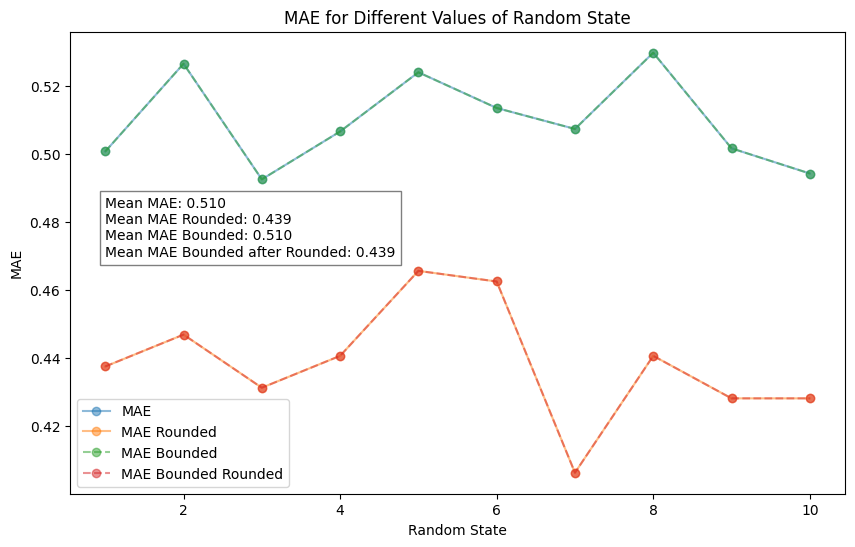

In [368]:
# Plot the MAE for the different values of random_state
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), mae_list, 'o-', label="MAE", alpha=0.5)
plt.plot(range(1, 11), mae_rounded, 'o-', label="MAE Rounded", alpha=0.5)
plt.plot(range(1, 11), mae_bounded, 'o--', label="MAE Bounded", alpha=0.5)
plt.plot(range(1, 11), mae_bounded_rounded, 'o--', label="MAE Bounded Rounded", alpha=0.5)
plt.xlabel("Random State")
plt.ylabel("MAE")
plt.title("MAE for Different Values of Random State")
# Add the Mean MAE for each method on a text box
plt.text(1, 0.47, f"Mean MAE: {np.mean(mae_list):.3f} \nMean MAE Rounded: {np.mean(mae_rounded):.3f} \nMean MAE Bounded: {np.mean(mae_bounded):.3f} \nMean MAE Bounded after Rounded: {np.mean(mae_bounded_rounded):.3f}", bbox=dict(facecolor='white', alpha=0.5))


plt.legend()
# Save the figure
plt.savefig(IMAGES_DIR / "mae.png")
plt.show()



# Question 3

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multila

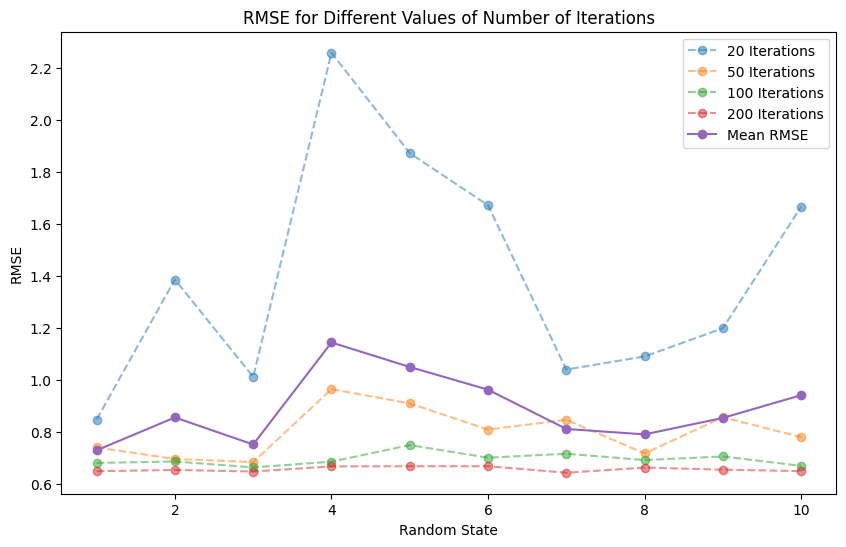

ValueError: x and y must have same first dimension, but have shapes (4,) and (1,)

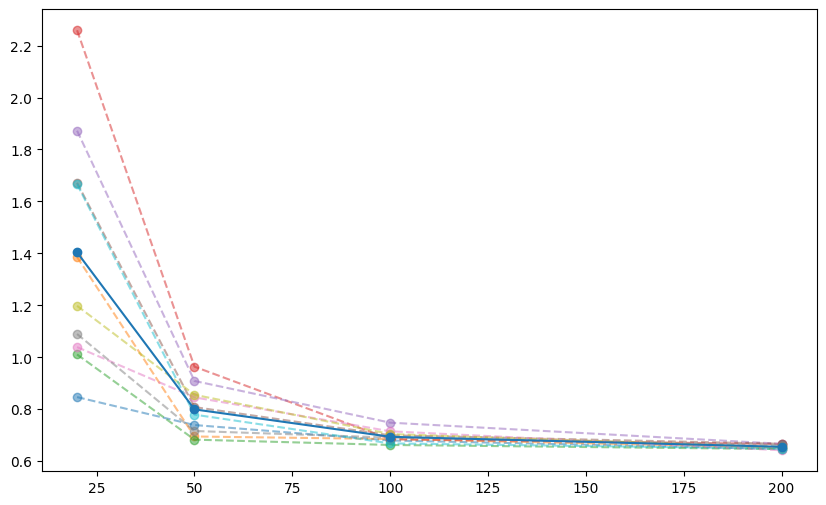

In [369]:
iterations = [20, 50, 100, 200]
rmse_results_matrix = np.zeros((10, 4))

for random_state in range(1, 11):
    for num_iterations in iterations:
        # Create the classifier
        mlp = MLPRegressor(hidden_layer_sizes=(10, 10),
                           activation='relu',
                           validation_fraction=0.2,
                           max_iter=num_iterations,
                           random_state=random_state)
        
        # Fit the classifier to the training data
        mlp.fit(X_train, y_train)

        # Make predictions and calculate RMSE
        predictions = mlp.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        rmse_results_matrix[random_state - 1, iterations.index(num_iterations)] = rmse

# Plot the RMSE for the different values of random_state
plt.figure(figsize=(10, 6))

# Plot the RMSE for the different values of random_state
for i in range(4):
    plt.plot(range(1, 11), rmse_results_matrix[:, i], 'o--', label=f"{iterations[i]} Iterations", alpha=0.5)

# Plot the mean RMSE
plt.plot(range(1, 11), np.mean(rmse_results_matrix, axis=1), 'o-', label="Mean RMSE")

# Graph labels
plt.legend()
plt.xlabel("Random State")
plt.ylabel("RMSE")
plt.title("RMSE for Different Values of Number of Iterations")

# Save the figure
plt.savefig(IMAGES_DIR / "rmse.png")
plt.show()

# Plot the RMSE for different values of iterations for each random state
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(iterations, rmse_results_matrix[i, :], 'o--', label=f"Random State = {i + 1}", alpha=0.5)

# Plot the mean RMSE
plt.plot(iterations, np.mean(rmse_results_matrix, axis=0), 'o-', label="Mean RMSE")
plt.legend()
plt.xlabel("Number of Iterations")
plt.ylabel("RMSE")
plt.title("RMSE for Different Values of Number of Iterations for Each Random State")
# Save the figure
plt.savefig(IMAGES_DIR / "rmse_iterations_random_state.png")
plt.show()
